Q1) Below is the example of the auto encoder I made
Q2) Describe and implement a data preprocessing approach.

    First I read in all 137 positive sequences as well as their reverse compliments
    Second, I split all negative sequence into 17bp, similar to the positive sequences and then added them
    to they were not present in the positive sequence
    Third, I took 54 positve sequence out of testing to be tested in a final test.
    Fourth, I generated two sets of positive seqs with mutation at the end of sequence at either 1 or 2 bp to 
    get 3504, 52992 'positive' sequences assuming that the middle of the sequences would obtain the most important info
    Fifth, I randomly sampled without replacement, 54 neg sequences for future testing, then 52992 sequence for trainging, that was
    then split into 3504, and 220 as well.
    
   Describe and implement a way to represent DNA sequence.
    
    Each 17bp fragment was encoded as a 1 by 68 sequecne of 0 and 1. Where each basepair consisted of 4 numbers. ex. A is 1000, T is 0100, C is 0010, and G is 0001.
    
   Develop and describe your network architecture (1 point)
   
    I wrote a network with a N by 64 input, N by 50 Hidden layer, and a N by 1 output. The output was a number between 0 and 1 where the closer to one means that it is more likely a transcription factor binding site and the closer to 0 the less likely it is a binding site.
    
    I used the Cross-entropy loss function as my loss funciton and used sigmoid as my activation function.
    
    I randomly initiated both weights and bias as well.
    
Q3) Develop a training regime (K-fold cross validation, bagging, etc) to test model performance. Describe and implement the regime and answer question 3 subquestions (1.5 point)

    I used the following for training. I did K-folds validation with a K equal to 4 to determine the approiate hyper parameters to use to avoid over fitting and get the highest accuracy based on the loss function.
    
    Then once I was confident with my hyperparameters I test training the model with the varying amount of input data, meaning not mutated, mutated at 1bp on the ends, or mutatated with 2 bp on the end. I always had a 1:1 ratio of Postive to Neg samples. Lastly, I looked at the loss score of the 110 samples I originally left out to determine the accuracy of each model to try and prevent over fitting. Ultimately I saw that the two mutations had the least amount of variation. 
    
    Final I reinitiated and trained the network using all Positive sequence mutated twice for a total of 52992 sequence. One key thing to note is only sequence seen in the origanol positive data were held out of the final negative training data.
    
Q4) Perform cross-validation experiments to test model hyperparameters. (1 point)
Develop and describe your choice of model hyperparameters 

    As stated above I compared the final loss score for test paramets held out. So i used 3/4 of the data to train the network and tested the with the last 4th and ultimately got the average loss between all iterations. Using this method I determined a learning rate of 3 would be optimal and having 50 neurons in the hidden network would also be best.

In [108]:
import numpy as np
import NN_Ian 
import read_files
import importlib
import matplotlib.pyplot as plt
import random
import Test
import pandas as pd

In [88]:
importlib.reload(NN_Ian)
importlib.reload(read_files)
importlib.reload(Test)

<module 'Test' from '/Users/ijones1/Documents/Final_Project_Skeleton/scripts/Test.py'>

# 8 x 3 x 8 Auto Encoder

In [3]:
inputs = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1]])
outputs = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1]])

In [4]:
NN = Test.dlnet(inputs.T, outputs.T, d1=8, h=3, d2=8, lr=2)

In [5]:
NN.gd(inputs.T, outputs.T, iter = 10000)

Cost after iteration 0: 0.698504
Cost after iteration 500: 1.059024
Cost after iteration 1000: 1.343165
Cost after iteration 1500: 1.510481
Cost after iteration 2000: 1.629612
Cost after iteration 2500: 1.722137
Cost after iteration 3000: 1.797754
Cost after iteration 3500: 1.861676
Cost after iteration 4000: 1.917027
Cost after iteration 4500: 1.965828
Cost after iteration 5000: 2.009462
Cost after iteration 5500: 2.048917
Cost after iteration 6000: 2.084920
Cost after iteration 6500: 2.118028
Cost after iteration 7000: 2.148670
Cost after iteration 7500: 2.177188
Cost after iteration 8000: 2.203856
Cost after iteration 8500: 2.228901
Cost after iteration 9000: 2.252508
Cost after iteration 9500: 2.274834


In [7]:
NN.test(inputs.T, outputs.T)[0]

array([[9.95082712e-01, 2.63243610e-10, 4.48236392e-12, 3.80646505e-07,
        4.77098591e-09, 3.32284168e-03, 2.26455504e-04, 2.77715288e-03],
       [1.20177458e-14, 9.90341897e-01, 3.64753647e-03, 3.93352846e-03,
        2.07333540e-13, 1.51499972e-03, 3.97140206e-12, 8.51431964e-13],
       [9.35412417e-15, 4.00550401e-03, 9.94384329e-01, 7.69050259e-09,
        1.40510480e-03, 2.00800844e-09, 1.21020481e-03, 2.92072126e-12],
       [9.49059796e-08, 4.53974023e-03, 7.46505333e-12, 9.90690506e-01,
        2.78217981e-11, 4.24100345e-05, 2.07586359e-19, 4.32406158e-03],
       [5.85361041e-08, 4.97419923e-07, 2.58424825e-03, 4.73590185e-06,
        9.96285166e-01, 3.69851127e-11, 7.21417439e-06, 2.39090956e-03],
       [1.76030168e-03, 2.04151561e-03, 6.52157440e-08, 1.23559047e-05,
        1.04698893e-15, 9.96200189e-01, 8.95629120e-05, 8.06104858e-10],
       [1.20685252e-03, 9.02693329e-07, 1.97708246e-03, 1.71796241e-09,
        1.22182569e-05, 6.18970759e-04, 9.97250785e-01, 4.

The above output demostrates how the auto encoder can take an input and 

# organizing the data

In [8]:
neg = read_files.getNeg() #read in negative sequences make sure they are not in positive sequences as well

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
positive
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
positive
positive
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
2

In [9]:
pos = read_files.getPos() # read in the positive sequences
pos = np.array(pos)

In [10]:
print(len(neg))
print(len(pos))

3107440
274


# saved for future testing

In [11]:
pos_future= np.random.choice(pos,54, replace=False)
len(pos_future)

54

# Original postive sequences

In [12]:
pos_final =np.array([])
for x in pos:
    if x not in pos_future:
        pos_final = np.append(pos_final, x)
len(pos_final)

220

# Positive sequence with 1bp mutated to get additional results

In [33]:
mut_pos_final=Test.mutate(pos_final, 1)
print(len(mut_pos_final))
print(len(mut_pos_final[0]))
mut_pos_final=np.array(mut_pos_final)
mut_pos_final=(np.unique(mut_pos_final))
print(len(mut_pos_final))

3520
17
3504


# Positive sequence with 2bp mutated to get additional results

In [35]:
mut2_pos_final=Test.mutate2(mut_pos_final, k=2)
print(len(mut2_pos_final))
print(len(mut2_pos_final[0]))
mut2_pos_final = np.array(mut2_pos_final)
mut2_pos_final = (np.unique(mut2_pos_final))
print(len(mut2_pos_final))

56064
17
52992


# Select random negative sequence for comparision

In [37]:
neg_future, mut2_neg_final = Test.get_neg_test(neg, pos_future, mut2_pos_final)

rand = np.random.choice(range(len(mut2_neg_final)), len(mut_pos_final))
mut_neg_final = []
for x in rand:
    mut_neg_final += [mut2_neg_final[x]]
    
rand = np.random.choice(range(len(mut_neg_final)), len(pos_final))
neg_final = []
for x in rand:
    neg_final += [mut_neg_final[x]]


In [39]:
print(len(pos_future))
print(len(pos_final))
print(len(mut_pos_final))
print(len(mut2_pos_final))
print(len(neg_future))
print(len(neg_final))
print(len(mut_neg_final))
print(len(mut2_neg_final))

54
220
3504
52992
54
220
3504
52992


# Perform Hot One Encoding

In [43]:
pos_fut_con = np.array(Test.convert(pos_future))
pos_fin_con = np.array(Test.convert(pos_final))
pos_mut_fin_con = np.array(Test.convert(mut_pos_final))
pos_mut2_fin_con = np.array(Test.convert(mut2_pos_final))
neg_fut_con = np.array(Test.convert(neg_future))
neg_fin_con = np.array(Test.convert(neg_final))
neg_mut_fin_con = np.array(Test.convert(mut_neg_final))
neg_mut2_fin_con = np.array(Test.convert(mut2_neg_final))

In [41]:
Future = np.append(pos_fut_con, neg_fut_con, axis=0)
Future_output = np.repeat([1,0], 54)
print(len(Future))
print(len(Future_output))

108
108


# Find Hyper parameters

1
Cost after iteration 0: 0.744622
Cost after iteration 500: 0.011326
Cost after iteration 1000: 0.004345
Cost after iteration 1500: 0.002512
Cost after iteration 2000: 0.001719
Cost after iteration 2500: 0.001288


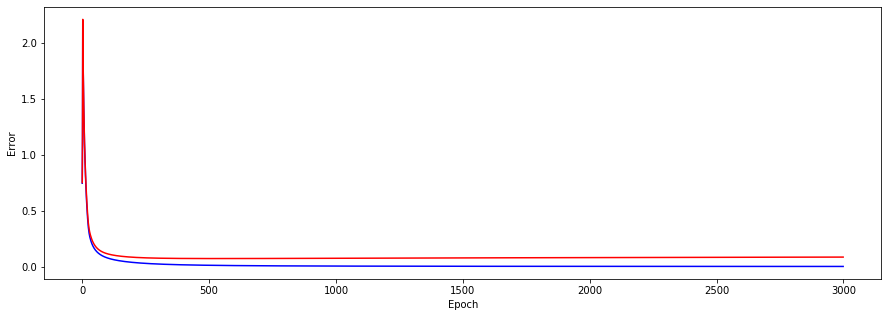

Cost after iteration 0: 0.749207
Cost after iteration 500: 0.008917
Cost after iteration 1000: 0.003566
Cost after iteration 1500: 0.002114
Cost after iteration 2000: 0.001468
Cost after iteration 2500: 0.001110


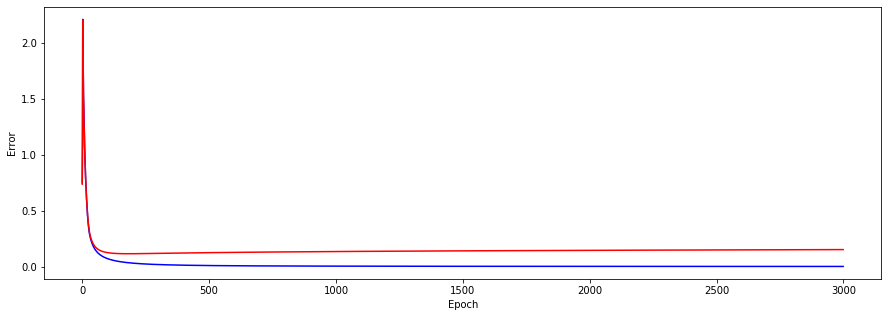

Cost after iteration 0: 0.744814
Cost after iteration 500: 0.008907
Cost after iteration 1000: 0.003591
Cost after iteration 1500: 0.002132
Cost after iteration 2000: 0.001482
Cost after iteration 2500: 0.001121


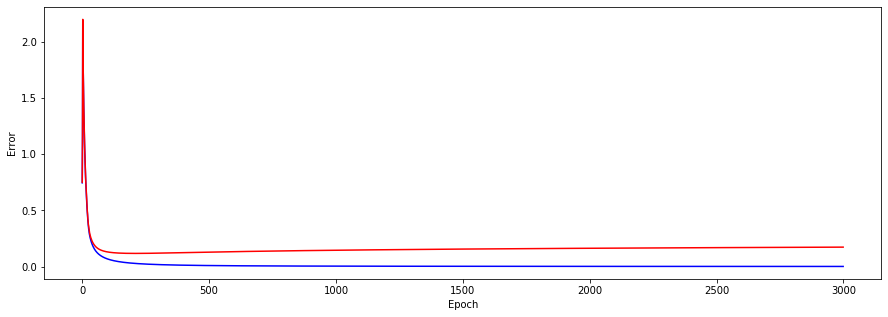

Cost after iteration 0: 0.746341
Cost after iteration 500: 0.010086
Cost after iteration 1000: 0.003890
Cost after iteration 1500: 0.002261
Cost after iteration 2000: 0.001552
Cost after iteration 2500: 0.001165


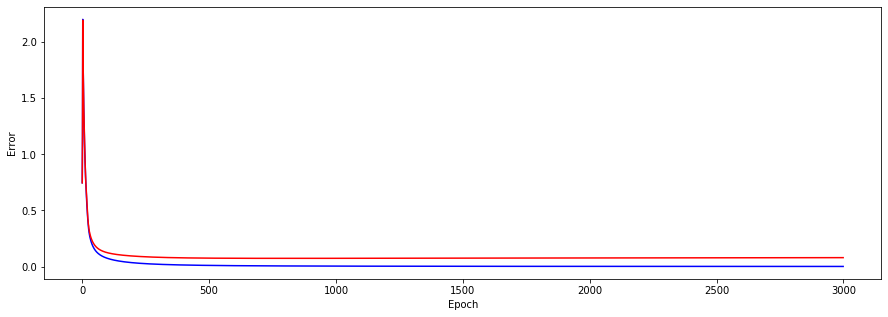

1.5
Cost after iteration 0: 0.744622
Cost after iteration 500: 0.006234
Cost after iteration 1000: 0.002400
Cost after iteration 1500: 0.001405
Cost after iteration 2000: 0.000970
Cost after iteration 2500: 0.000732


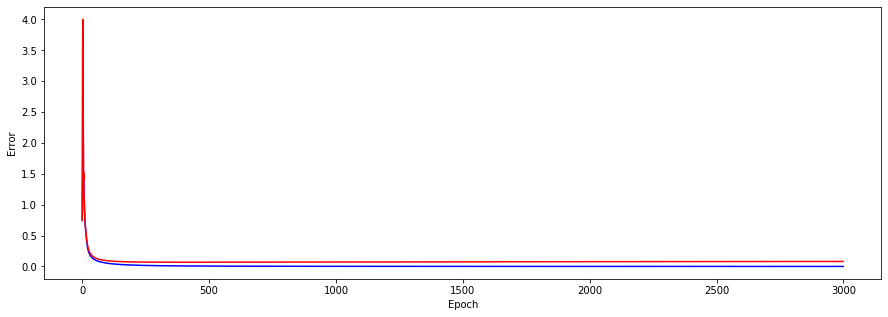

Cost after iteration 0: 0.749207
Cost after iteration 500: 0.005143
Cost after iteration 1000: 0.002066
Cost after iteration 1500: 0.001231
Cost after iteration 2000: 0.000858
Cost after iteration 2500: 0.000650


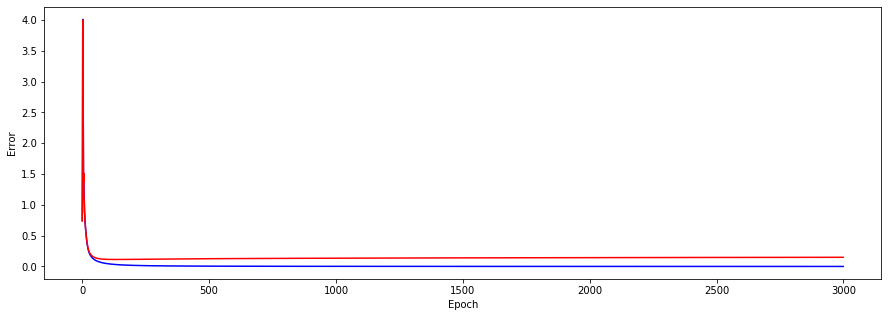

Cost after iteration 0: 0.744814
Cost after iteration 500: 0.005088
Cost after iteration 1000: 0.002056
Cost after iteration 1500: 0.001228
Cost after iteration 2000: 0.000858
Cost after iteration 2500: 0.000652


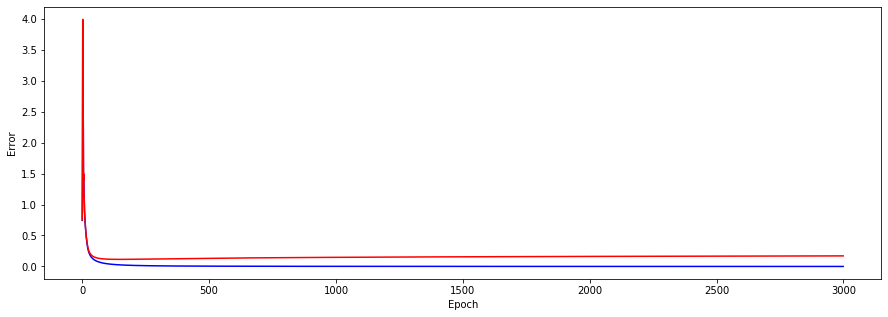

Cost after iteration 0: 0.746341
Cost after iteration 500: 0.005648
Cost after iteration 1000: 0.002205
Cost after iteration 1500: 0.001299
Cost after iteration 2000: 0.000900
Cost after iteration 2500: 0.000680


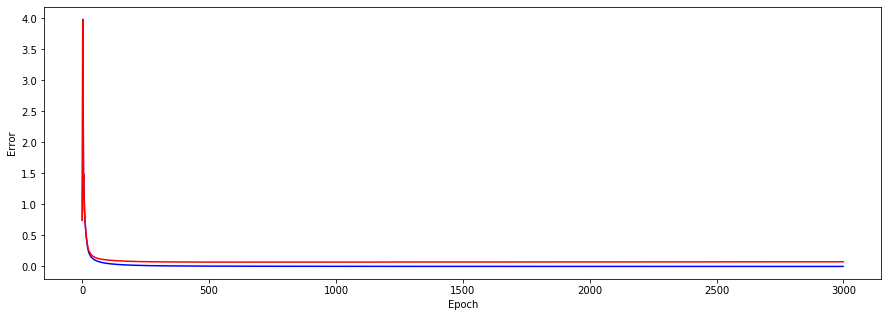

2
Cost after iteration 0: 0.744622
Cost after iteration 500: 0.004050
Cost after iteration 1000: 0.001574
Cost after iteration 1500: 0.000928
Cost after iteration 2000: 0.000645
Cost after iteration 2500: 0.000488


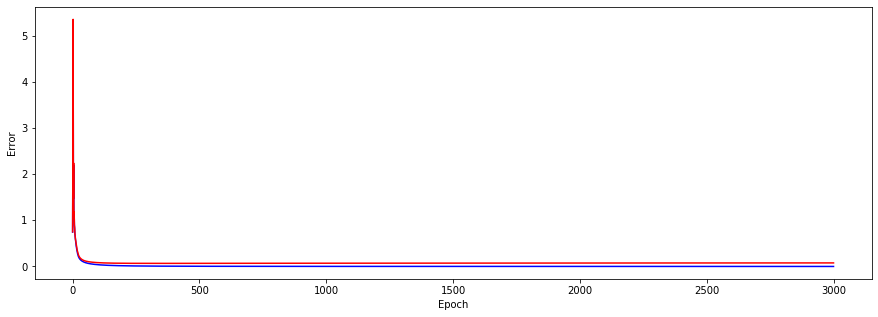

Cost after iteration 0: 0.749207
Cost after iteration 500: 0.003476
Cost after iteration 1000: 0.001404
Cost after iteration 1500: 0.000840
Cost after iteration 2000: 0.000588
Cost after iteration 2500: 0.000447


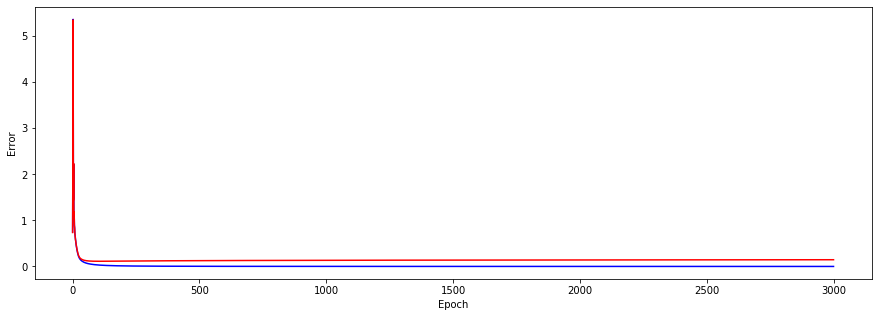

Cost after iteration 0: 0.744814
Cost after iteration 500: 0.003346
Cost after iteration 1000: 0.001350
Cost after iteration 1500: 0.000809
Cost after iteration 2000: 0.000566
Cost after iteration 2500: 0.000431


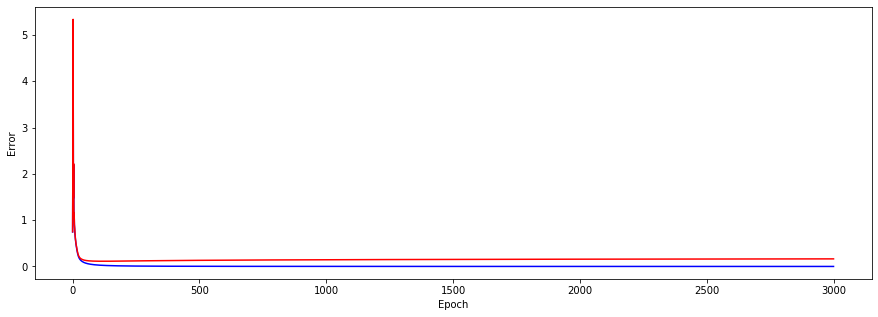

Cost after iteration 0: 0.746341
Cost after iteration 500: 0.003779
Cost after iteration 1000: 0.001491
Cost after iteration 1500: 0.000883
Cost after iteration 2000: 0.000613
Cost after iteration 2500: 0.000464


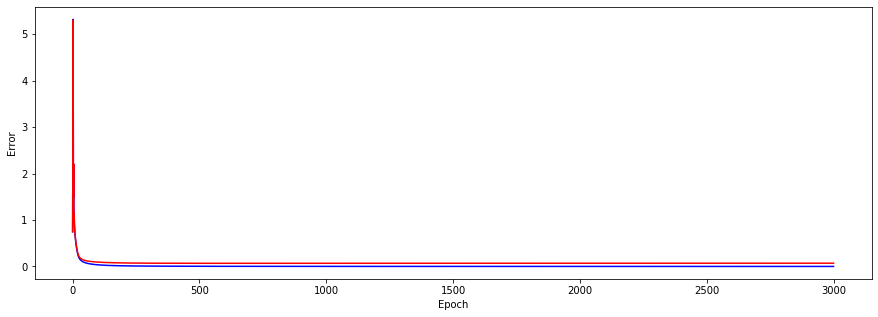

2.5
Cost after iteration 0: 0.744622
Cost after iteration 500: 0.002790
Cost after iteration 1000: 0.001075
Cost after iteration 1500: 0.000635
Cost after iteration 2000: 0.000442
Cost after iteration 2500: 0.000336


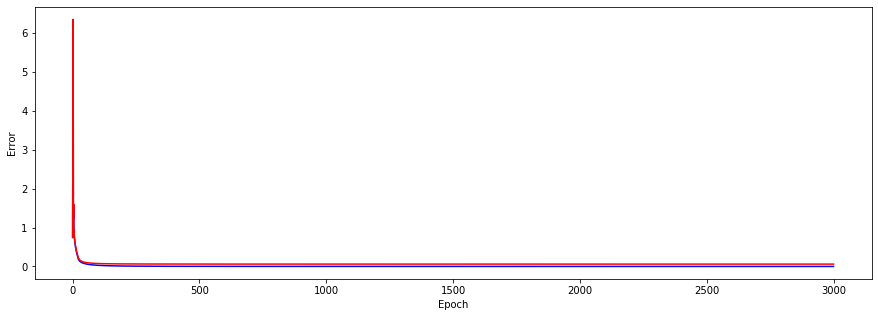

Cost after iteration 0: 0.749207
Cost after iteration 500: 0.002492
Cost after iteration 1000: 0.000996
Cost after iteration 1500: 0.000594
Cost after iteration 2000: 0.000415
Cost after iteration 2500: 0.000316


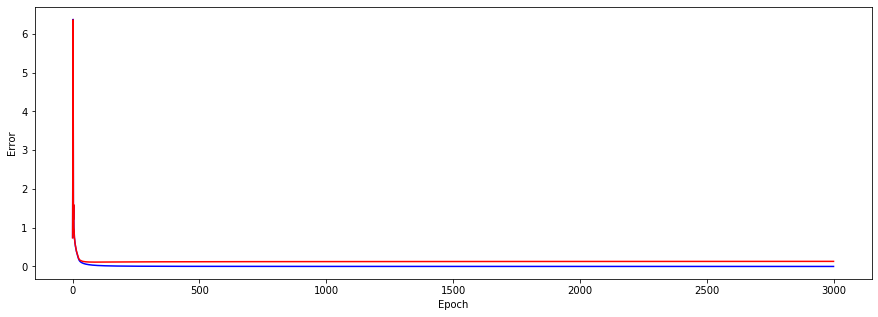

Cost after iteration 0: 0.744814
Cost after iteration 500: 0.002427
Cost after iteration 1000: 0.000996
Cost after iteration 1500: 0.000603
Cost after iteration 2000: 0.000425
Cost after iteration 2500: 0.000326


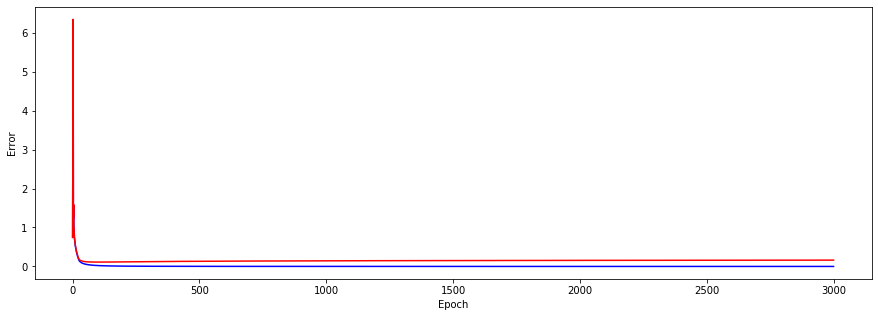

Cost after iteration 0: 0.746341
Cost after iteration 500: 0.002688
Cost after iteration 1000: 0.001060
Cost after iteration 1500: 0.000630
Cost after iteration 2000: 0.000440
Cost after iteration 2500: 0.000334


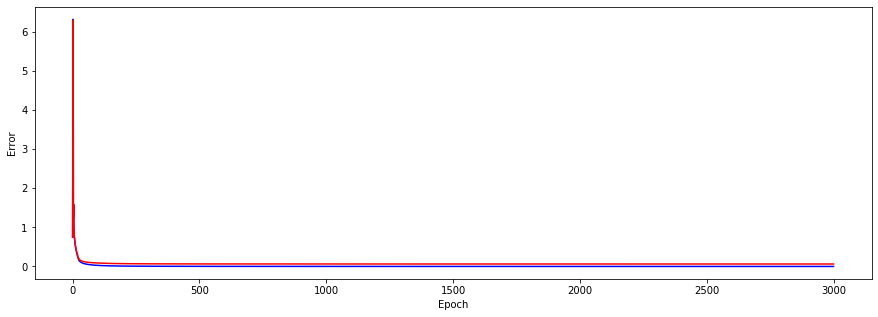

3
Cost after iteration 0: 0.744622
Cost after iteration 500: 0.002021
Cost after iteration 1000: 0.000802
Cost after iteration 1500: 0.000482
Cost after iteration 2000: 0.000339
Cost after iteration 2500: 0.000260


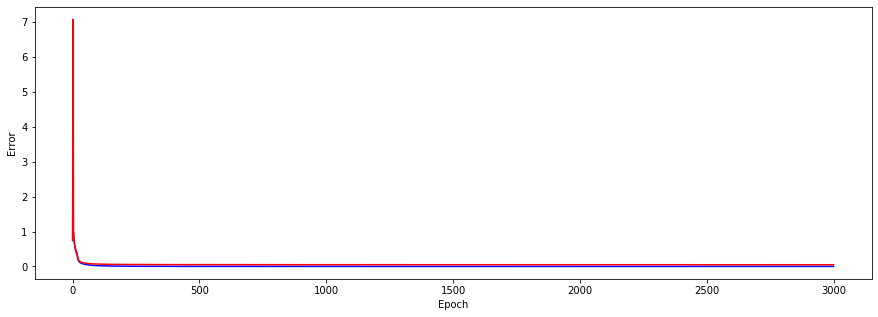

Cost after iteration 0: 0.749207
Cost after iteration 500: 0.001896
Cost after iteration 1000: 0.000765
Cost after iteration 1500: 0.000461
Cost after iteration 2000: 0.000324
Cost after iteration 2500: 0.000248


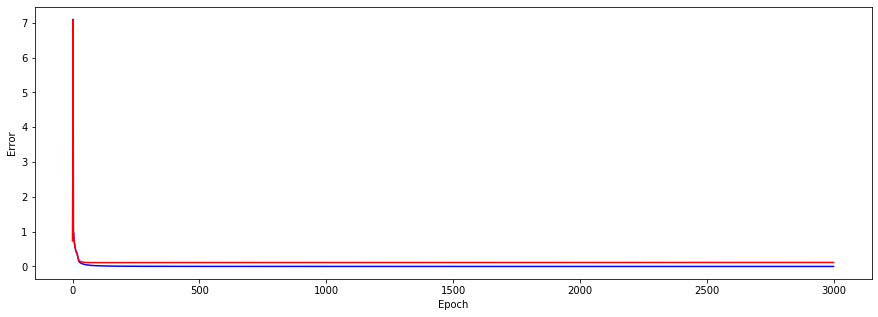

Cost after iteration 0: 0.744814
Cost after iteration 500: 0.001874
Cost after iteration 1000: 0.000773
Cost after iteration 1500: 0.000470
Cost after iteration 2000: 0.000333
Cost after iteration 2500: 0.000255


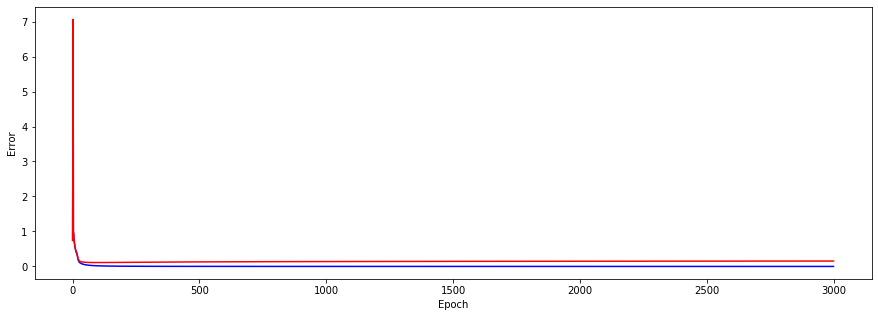

Cost after iteration 0: 0.746341
Cost after iteration 500: 0.002047
Cost after iteration 1000: 0.000811
Cost after iteration 1500: 0.000484
Cost after iteration 2000: 0.000339
Cost after iteration 2500: 0.000259


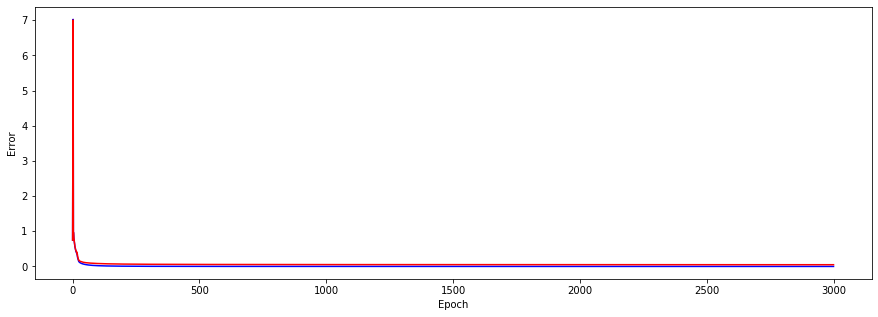

3.5
Cost after iteration 0: 0.744622
Cost after iteration 500: 0.001761
Cost after iteration 1000: 0.000707
Cost after iteration 1500: 0.000426
Cost after iteration 2000: 0.000301
Cost after iteration 2500: 0.000230


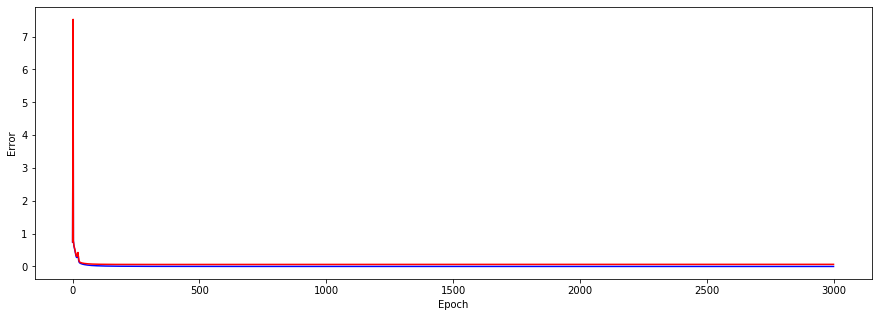

Cost after iteration 0: 0.749207
Cost after iteration 500: 0.001670
Cost after iteration 1000: 0.000690
Cost after iteration 1500: 0.000419
Cost after iteration 2000: 0.000296
Cost after iteration 2500: 0.000227


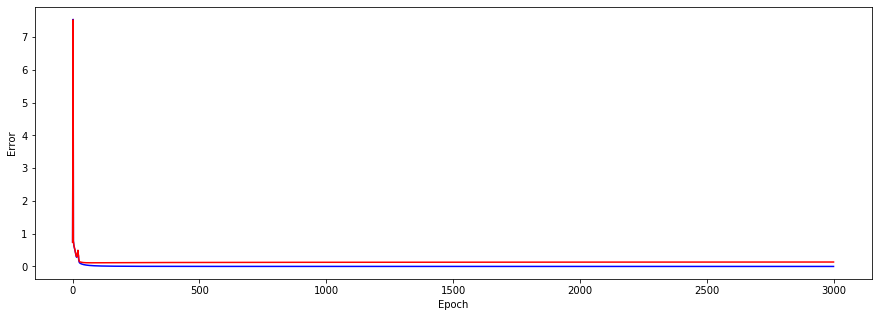

Cost after iteration 0: 0.744814
Cost after iteration 500: 0.001624
Cost after iteration 1000: 0.000679
Cost after iteration 1500: 0.000415
Cost after iteration 2000: 0.000295
Cost after iteration 2500: 0.000227


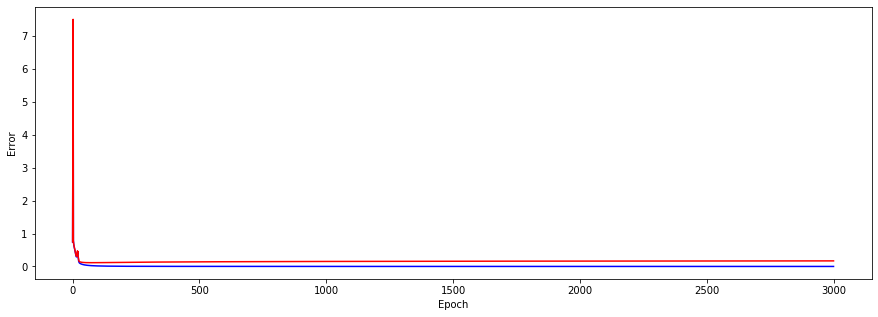

Cost after iteration 0: 0.746341
Cost after iteration 500: 0.001803
Cost after iteration 1000: 0.000724
Cost after iteration 1500: 0.000433
Cost after iteration 2000: 0.000304
Cost after iteration 2500: 0.000231


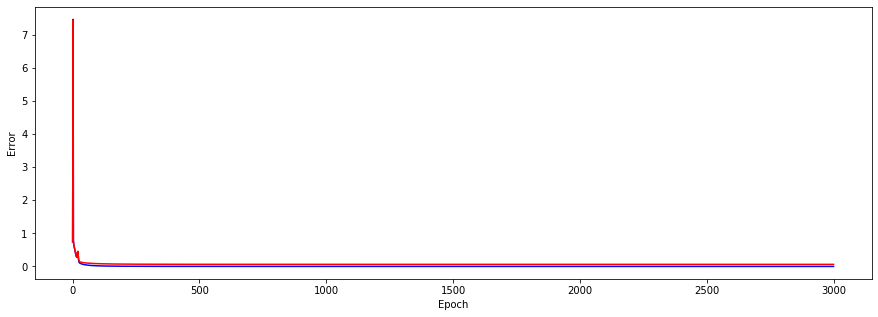

4
Cost after iteration 0: 0.744622
Cost after iteration 500: 0.001927
Cost after iteration 1000: 0.000774
Cost after iteration 1500: 0.000464
Cost after iteration 2000: 0.000326
Cost after iteration 2500: 0.000248


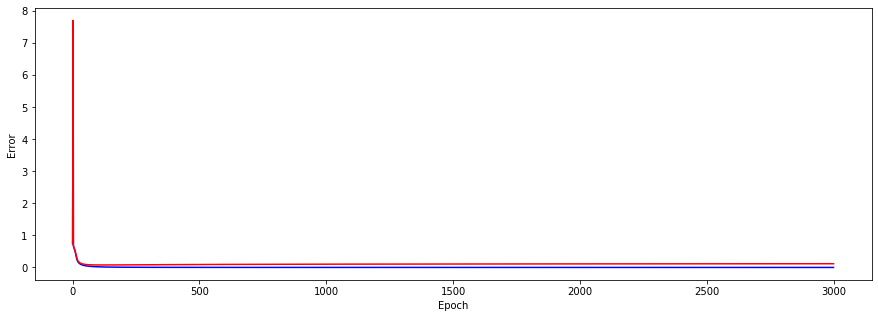

Cost after iteration 0: 0.749207
Cost after iteration 500: 0.001653
Cost after iteration 1000: 0.000688
Cost after iteration 1500: 0.000419
Cost after iteration 2000: 0.000297
Cost after iteration 2500: 0.000228


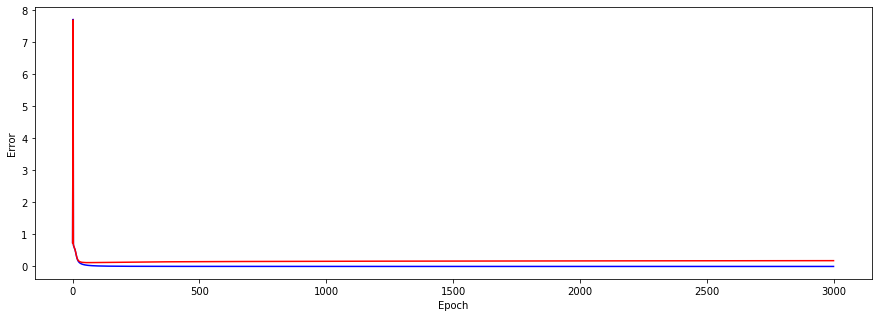

Cost after iteration 0: 0.744814
Cost after iteration 500: 0.001692
Cost after iteration 1000: 0.000714
Cost after iteration 1500: 0.000439
Cost after iteration 2000: 0.000313
Cost after iteration 2500: 0.000241


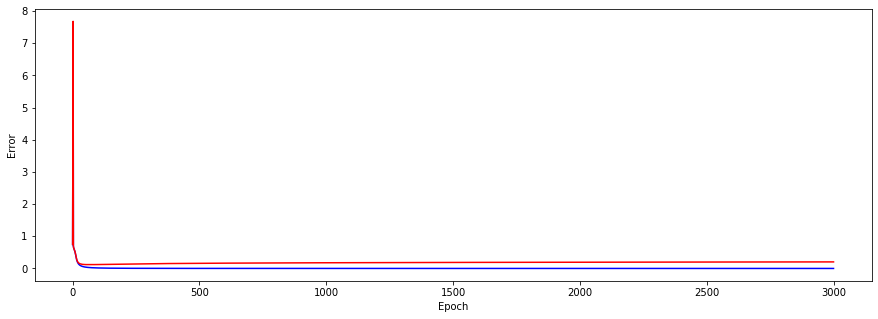

Cost after iteration 0: 0.746341
Cost after iteration 500: 0.001831
Cost after iteration 1000: 0.000752
Cost after iteration 1500: 0.000456
Cost after iteration 2000: 0.000322
Cost after iteration 2500: 0.000247


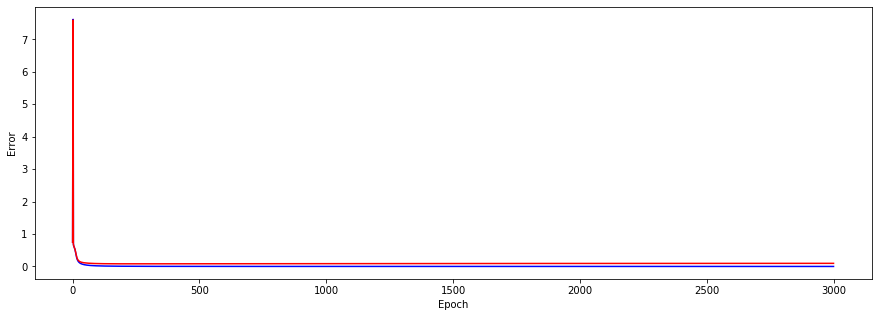

[(1, array([[0.12211494]])),
 (1.5, array([[0.11924838]])),
 (2, array([[0.11431356]])),
 (2.5, array([[0.10415832]])),
 (3, array([[0.09219532]])),
 (3.5, array([[0.10803971]])),
 (4, array([[0.14909419]]))]

In [55]:
k1, k2, k3, k4, output = Test.k_fold(pos_fin_con, neg_fin_con)
lr_list = [1,1.5,2,2.5,3,3.5,4]
out = []
for l in lr_list:
    print(l)
    x = Test.test_NN(k1,k2,k3,k4, output, lr=l)
    out += [(l,x)]
out

Decided to use a learning rate of 3 as it had to lowest score difference

35
Cost after iteration 0: 0.807233
Cost after iteration 500: 0.001925
Cost after iteration 1000: 0.000805
Cost after iteration 1500: 0.000493
Cost after iteration 2000: 0.000351
Cost after iteration 2500: 0.000270


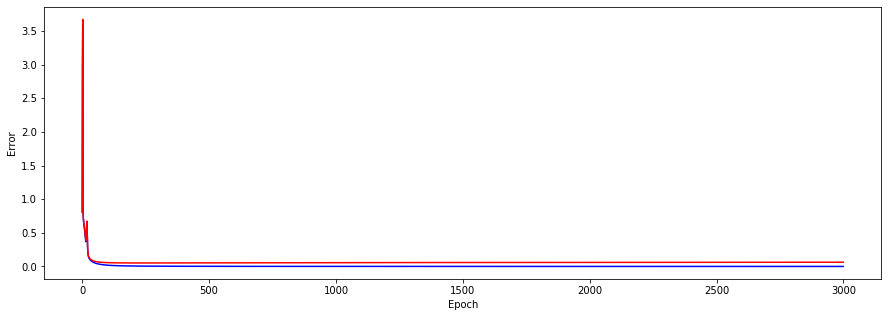

Cost after iteration 0: 0.810395
Cost after iteration 500: 0.002046
Cost after iteration 1000: 0.000859
Cost after iteration 1500: 0.000527
Cost after iteration 2000: 0.000374
Cost after iteration 2500: 0.000288


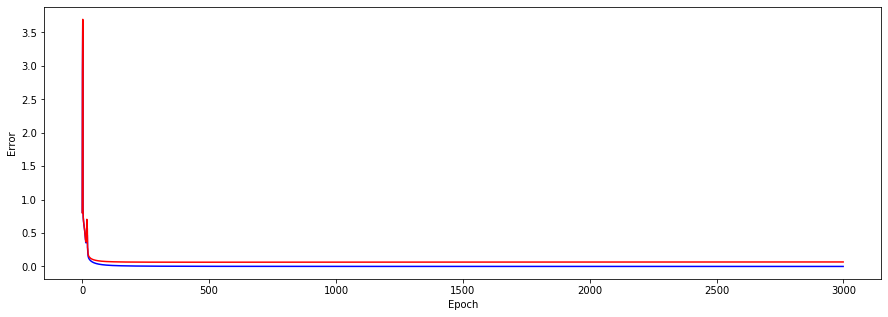

Cost after iteration 0: 0.806699
Cost after iteration 500: 0.002068
Cost after iteration 1000: 0.000882
Cost after iteration 1500: 0.000544
Cost after iteration 2000: 0.000388
Cost after iteration 2500: 0.000299


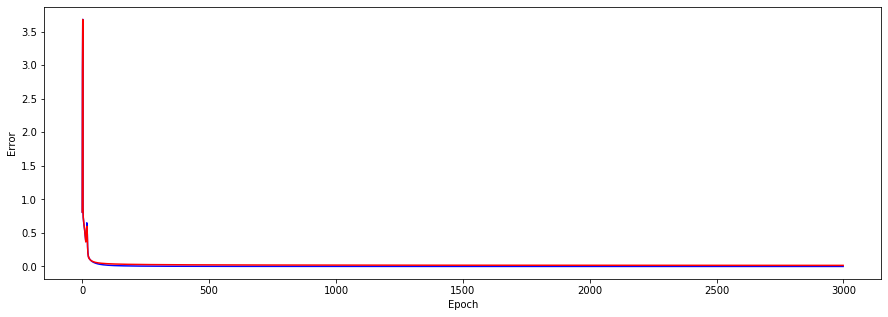

Cost after iteration 0: 0.809729
Cost after iteration 500: 0.001952
Cost after iteration 1000: 0.000820
Cost after iteration 1500: 0.000500
Cost after iteration 2000: 0.000354
Cost after iteration 2500: 0.000272


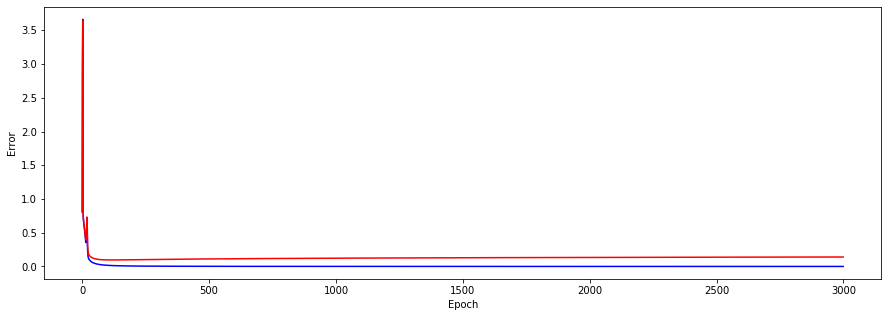

45
Cost after iteration 0: 0.744260
Cost after iteration 500: 0.001672
Cost after iteration 1000: 0.000703
Cost after iteration 1500: 0.000432
Cost after iteration 2000: 0.000308
Cost after iteration 2500: 0.000238


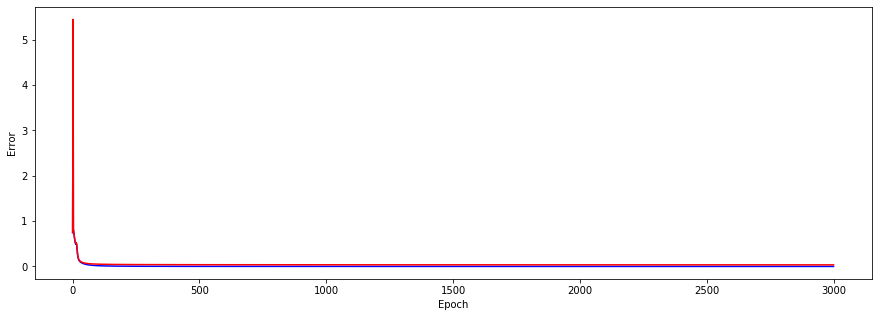

Cost after iteration 0: 0.747655
Cost after iteration 500: 0.001757
Cost after iteration 1000: 0.000728
Cost after iteration 1500: 0.000444
Cost after iteration 2000: 0.000315
Cost after iteration 2500: 0.000242


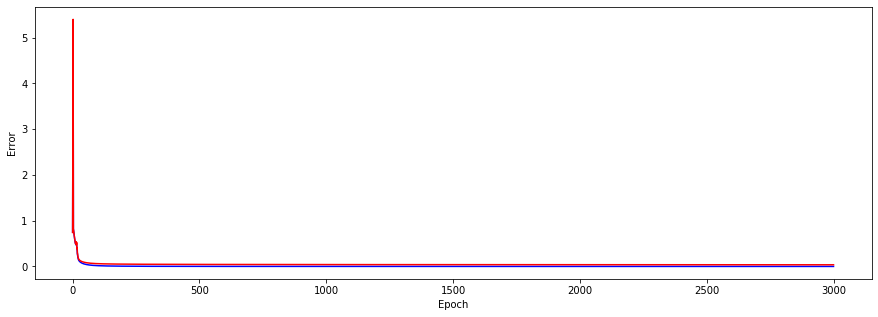

Cost after iteration 0: 0.746565
Cost after iteration 500: 0.001801
Cost after iteration 1000: 0.000754
Cost after iteration 1500: 0.000461
Cost after iteration 2000: 0.000328
Cost after iteration 2500: 0.000252


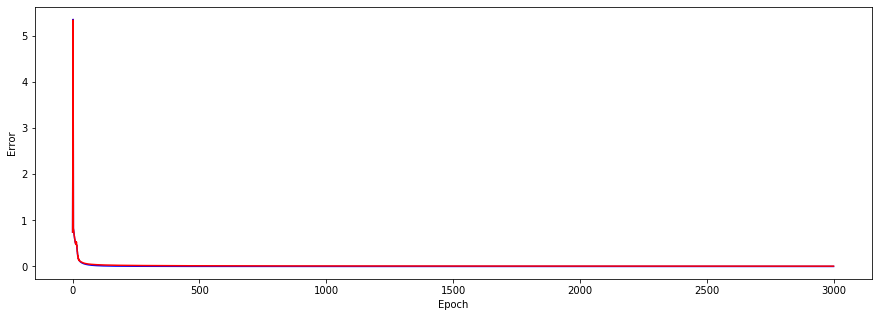

Cost after iteration 0: 0.746057
Cost after iteration 500: 0.001788
Cost after iteration 1000: 0.000748
Cost after iteration 1500: 0.000456
Cost after iteration 2000: 0.000322
Cost after iteration 2500: 0.000247


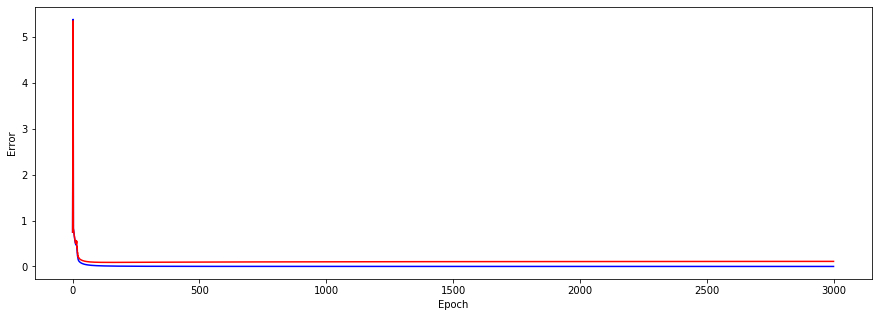

50
Cost after iteration 0: 0.700393
Cost after iteration 500: 0.001594
Cost after iteration 1000: 0.000677
Cost after iteration 1500: 0.000419
Cost after iteration 2000: 0.000300
Cost after iteration 2500: 0.000232


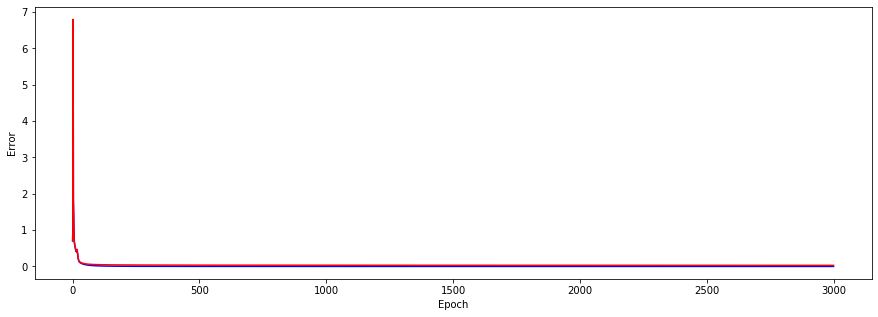

Cost after iteration 0: 0.701973
Cost after iteration 500: 0.001700
Cost after iteration 1000: 0.000709
Cost after iteration 1500: 0.000435
Cost after iteration 2000: 0.000310
Cost after iteration 2500: 0.000239


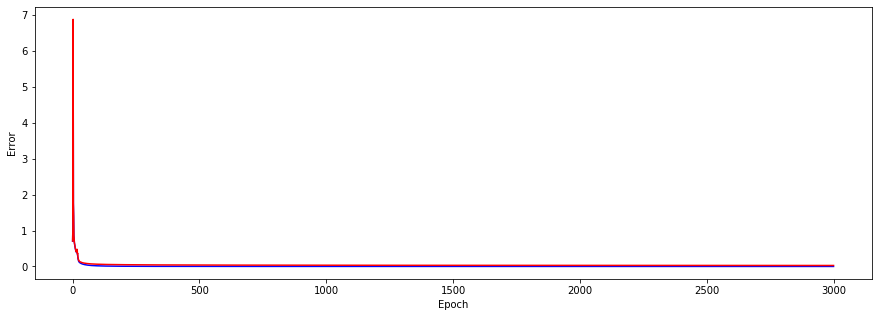

Cost after iteration 0: 0.704917
Cost after iteration 500: 0.001724
Cost after iteration 1000: 0.000724
Cost after iteration 1500: 0.000445
Cost after iteration 2000: 0.000317
Cost after iteration 2500: 0.000245


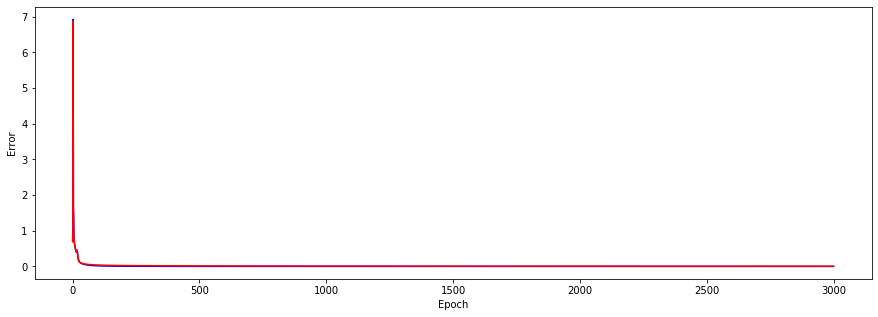

Cost after iteration 0: 0.703857
Cost after iteration 500: 0.001652
Cost after iteration 1000: 0.000695
Cost after iteration 1500: 0.000427
Cost after iteration 2000: 0.000304
Cost after iteration 2500: 0.000235


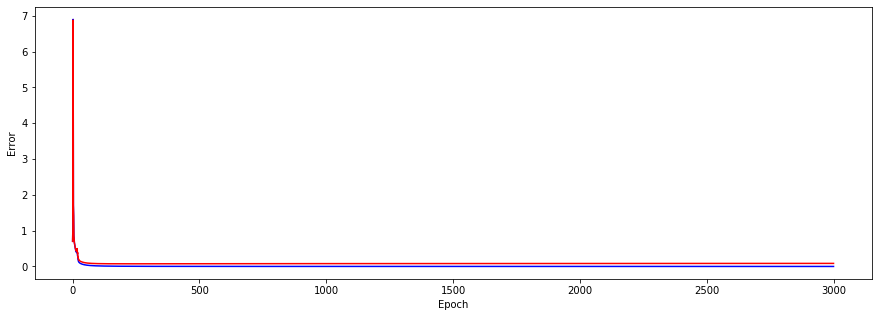

60
Cost after iteration 0: 0.746882
Cost after iteration 500: 0.001856
Cost after iteration 1000: 0.000749
Cost after iteration 1500: 0.000453
Cost after iteration 2000: 0.000319
Cost after iteration 2500: 0.000245


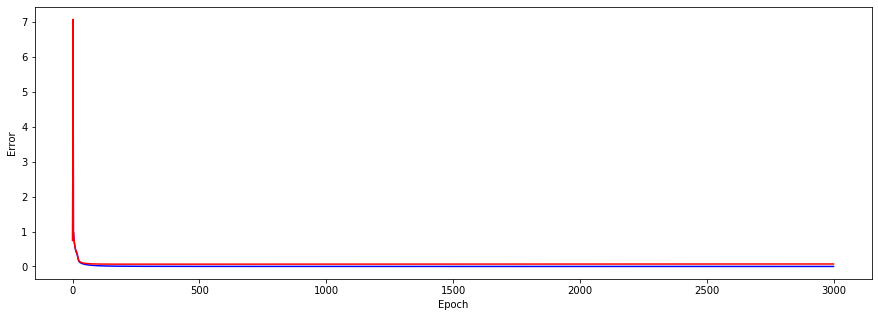

Cost after iteration 0: 0.745328
Cost after iteration 500: 0.002136
Cost after iteration 1000: 0.000854
Cost after iteration 1500: 0.000510
Cost after iteration 2000: 0.000356
Cost after iteration 2500: 0.000271


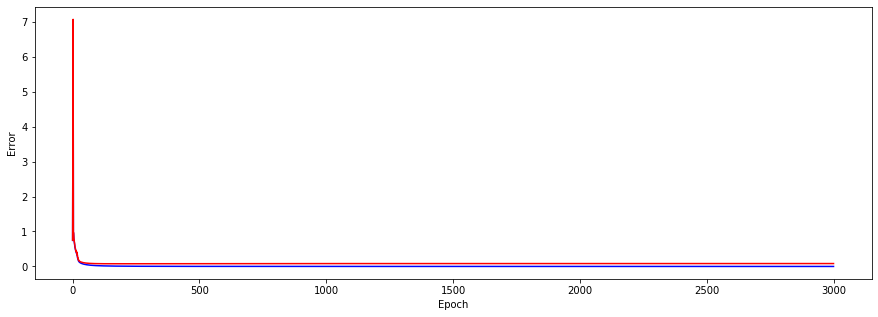

Cost after iteration 0: 0.745917
Cost after iteration 500: 0.002008
Cost after iteration 1000: 0.000803
Cost after iteration 1500: 0.000483
Cost after iteration 2000: 0.000340
Cost after iteration 2500: 0.000260


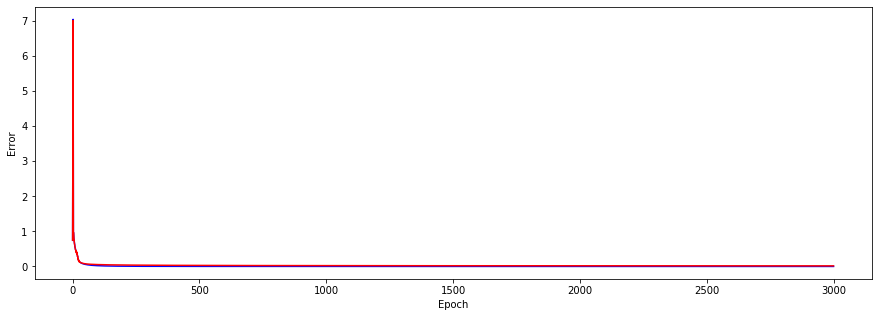

Cost after iteration 0: 0.746857
Cost after iteration 500: 0.002026
Cost after iteration 1000: 0.000824
Cost after iteration 1500: 0.000496
Cost after iteration 2000: 0.000349
Cost after iteration 2500: 0.000267


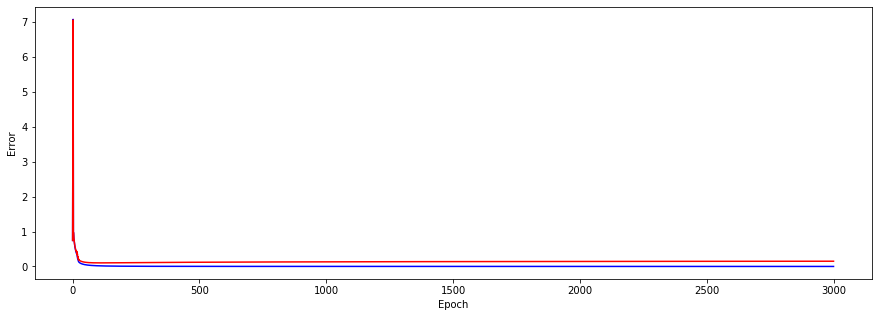

65
Cost after iteration 0: 0.745780
Cost after iteration 500: 0.001540
Cost after iteration 1000: 0.000654
Cost after iteration 1500: 0.000403
Cost after iteration 2000: 0.000288
Cost after iteration 2500: 0.000222


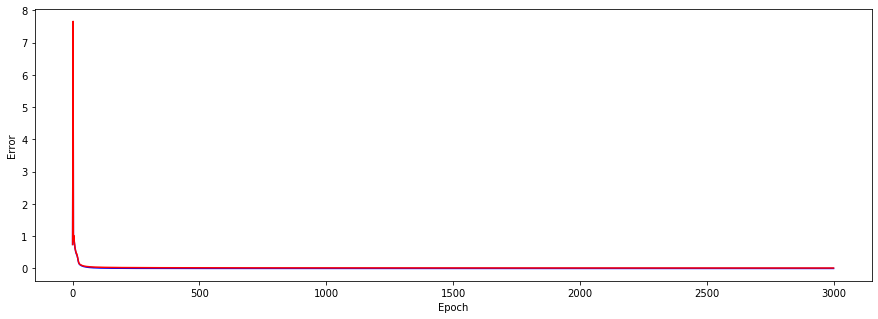

Cost after iteration 0: 0.744903
Cost after iteration 500: 0.001619
Cost after iteration 1000: 0.000685
Cost after iteration 1500: 0.000422
Cost after iteration 2000: 0.000301
Cost after iteration 2500: 0.000233


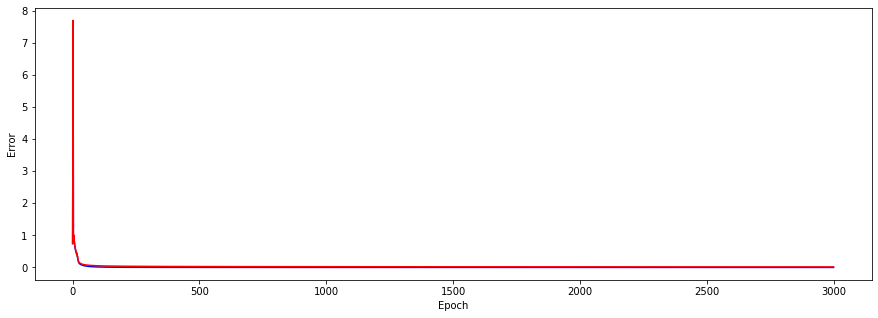

Cost after iteration 0: 0.745394
Cost after iteration 500: 0.001581
Cost after iteration 1000: 0.000676
Cost after iteration 1500: 0.000419
Cost after iteration 2000: 0.000300
Cost after iteration 2500: 0.000232


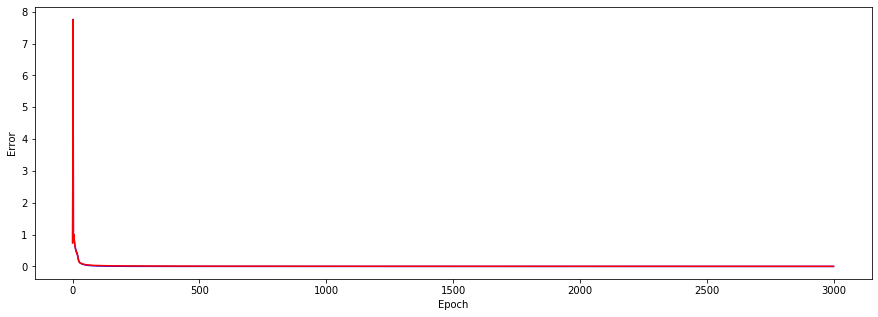

Cost after iteration 0: 0.742514
Cost after iteration 500: 0.001592
Cost after iteration 1000: 0.000675
Cost after iteration 1500: 0.000417
Cost after iteration 2000: 0.000297
Cost after iteration 2500: 0.000230


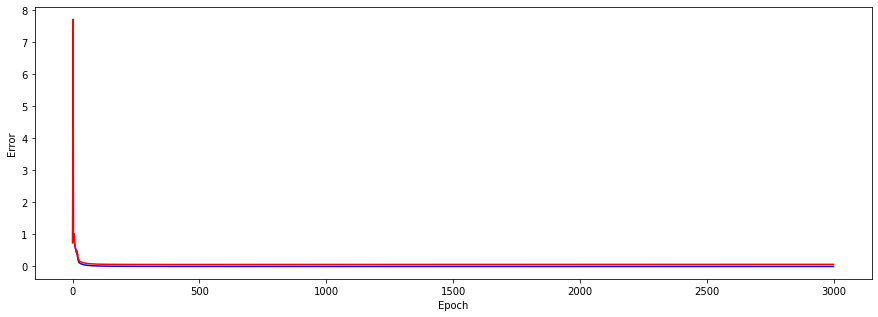

70
Cost after iteration 0: 0.690256
Cost after iteration 500: 0.001822
Cost after iteration 1000: 0.000756
Cost after iteration 1500: 0.000461
Cost after iteration 2000: 0.000327
Cost after iteration 2500: 0.000251


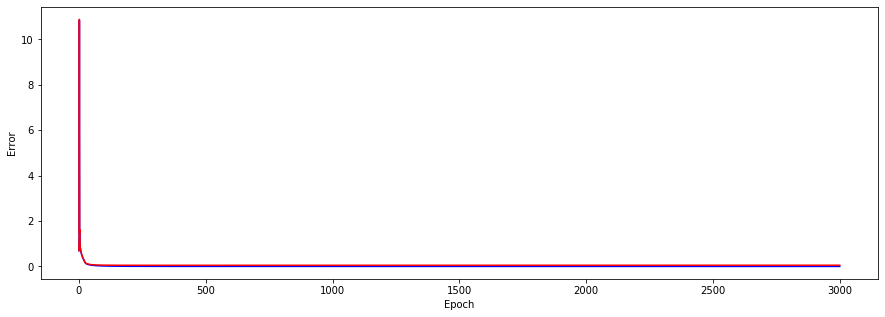

Cost after iteration 0: 0.695205
Cost after iteration 500: 0.001970
Cost after iteration 1000: 0.000816
Cost after iteration 1500: 0.000497
Cost after iteration 2000: 0.000352
Cost after iteration 2500: 0.000270


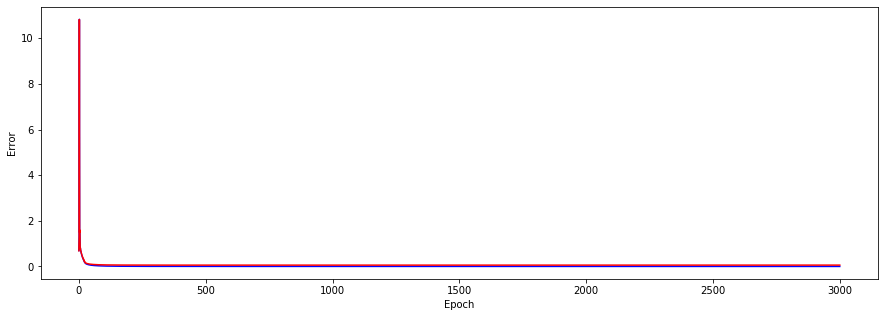

Cost after iteration 0: 0.692937
Cost after iteration 500: 0.001973
Cost after iteration 1000: 0.000821
Cost after iteration 1500: 0.000501
Cost after iteration 2000: 0.000356
Cost after iteration 2500: 0.000274


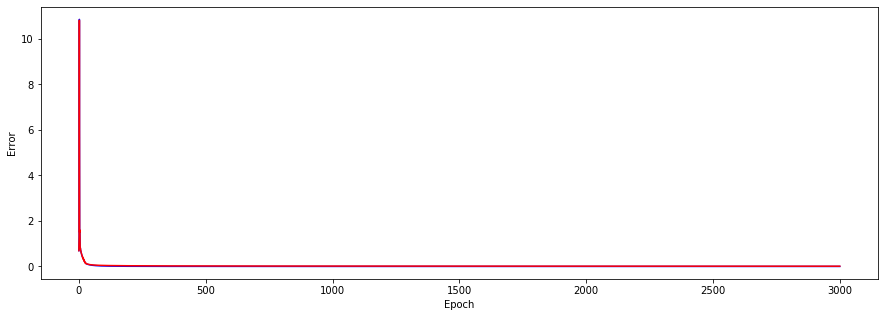

Cost after iteration 0: 0.694105
Cost after iteration 500: 0.001934
Cost after iteration 1000: 0.000818
Cost after iteration 1500: 0.000503
Cost after iteration 2000: 0.000358
Cost after iteration 2500: 0.000275


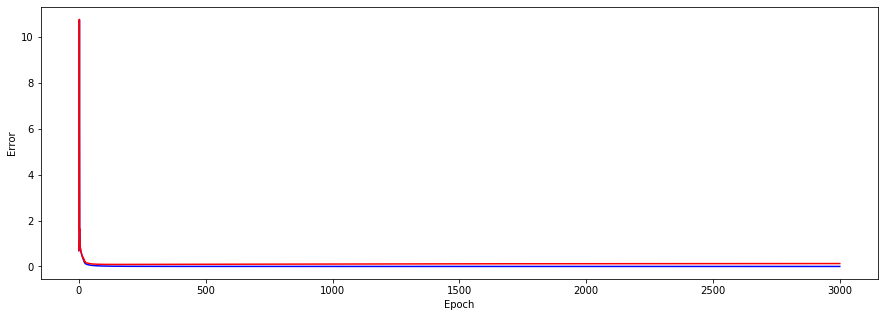

[(35, array([[0.07170579]])),
 (45, array([[0.04723186]])),
 (50, array([[0.03749531]])),
 (60, array([[0.08013625]])),
 (65, array([[0.02493236]])),
 (70, array([[0.06257564]]))]

In [54]:
hidden_list = [35,45,50,60,65,70]
out = []
for hid in hidden_list:
    print(hid)
    x = Test.test_NN(k1,k2,k3,k4, output, h=hid)
    out += [(hid,x)]
out

I decided to use 50 neurons in the hidden network

# No mutation test

Cost after iteration 0: 0.747960
Cost after iteration 500: 0.001979
Cost after iteration 1000: 0.000786
Cost after iteration 1500: 0.000472
Cost after iteration 2000: 0.000332
Cost after iteration 2500: 0.000254


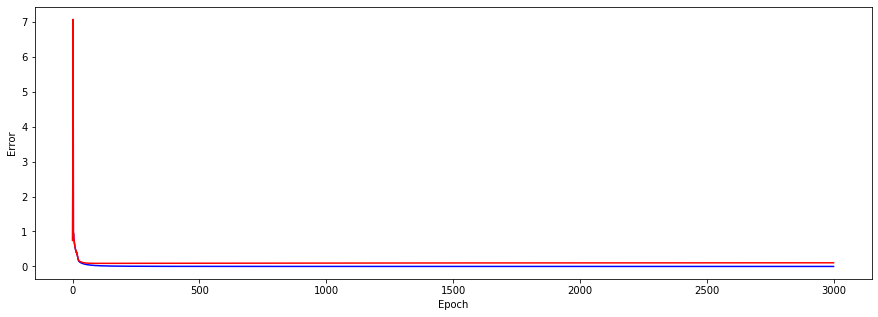

Cost after iteration 0: 0.747027
Cost after iteration 500: 0.002235
Cost after iteration 1000: 0.000887
Cost after iteration 1500: 0.000531
Cost after iteration 2000: 0.000372
Cost after iteration 2500: 0.000284


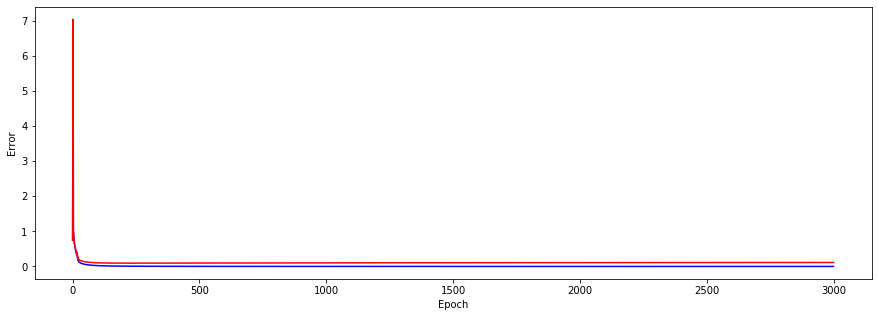

Cost after iteration 0: 0.746649
Cost after iteration 500: 0.001969
Cost after iteration 1000: 0.000789
Cost after iteration 1500: 0.000474
Cost after iteration 2000: 0.000333
Cost after iteration 2500: 0.000254


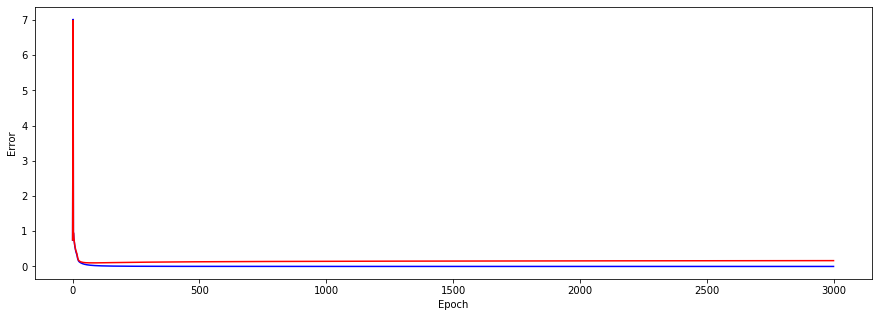

Cost after iteration 0: 0.746923
Cost after iteration 500: 0.001992
Cost after iteration 1000: 0.000804
Cost after iteration 1500: 0.000485
Cost after iteration 2000: 0.000342
Cost after iteration 2500: 0.000262


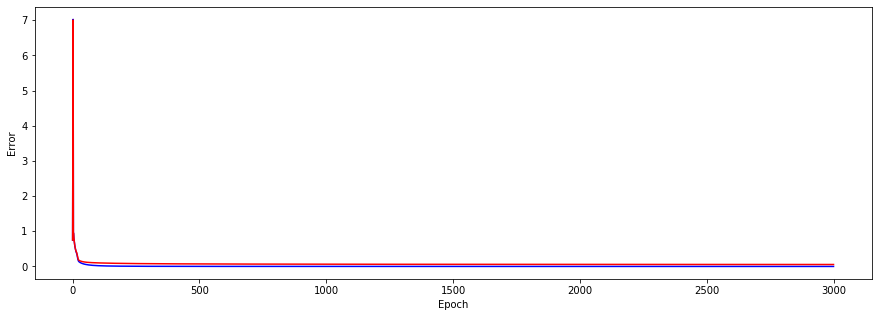

array([[0.10988831]])

In [195]:
k1, k2, k3, k4, output = Test.k_fold(pos_fin_con, neg_fin_con)
Test.test_NN(k1,k2,k3,k4, output)

In [151]:
all_train = np.append(k1, k2, axis=0)
all_train = np.append(all_train, k3, axis=0)
all_train = np.append(all_train, k4, axis=0)
print(len(all_train))
all_output = np.tile([1,0],int(len(all_train)/2))
print(len(all_output))
all_output=all_output.reshape((len(all_output)),1)
all_output.shape
NN = Test.dlnet(all_train.T, all_output.T)

440
440


In [157]:
for x in Future:
    for y in all_train:
        if np.array_equal(x, y):
            print('bad!!!')

In [152]:
NN.gd(all_train.T, all_output.T, Future.T, Future_output.T, iter = 3000)

Cost after iteration 0: 0.747140
Cost after iteration 500: 0.002348
Cost after iteration 1000: 0.000927
Cost after iteration 1500: 0.000556
Cost after iteration 2000: 0.000392
Cost after iteration 2500: 0.000300


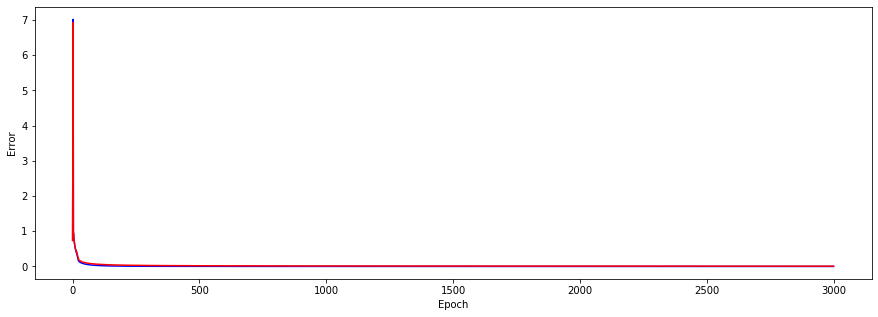

0.007914430049418459


In [155]:
# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history, color = 'blue')
plt.plot(NN.epoch_list, NN.error_test, color = 'red')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()
print(NN.error_test[-1])

In [156]:
NN.test(Future.T, Future_output.T)

(array([[9.99988275e-01, 9.99955003e-01, 9.71001165e-01, 9.99599724e-01,
         9.99999480e-01, 9.97356284e-01, 9.99988111e-01, 9.99991358e-01,
         9.66966943e-01, 9.99954596e-01, 9.99999653e-01, 9.99651182e-01,
         9.99988442e-01, 9.99980434e-01, 9.99695576e-01, 9.99988507e-01,
         9.99981900e-01, 9.99908300e-01, 9.99989543e-01, 9.99859161e-01,
         9.99926645e-01, 9.94701894e-01, 9.99998065e-01, 9.99987266e-01,
         9.99972187e-01, 9.99997481e-01, 9.99990218e-01, 9.99623257e-01,
         9.99998349e-01, 9.94857993e-01, 9.99987271e-01, 9.99995085e-01,
         9.99915557e-01, 9.99707649e-01, 9.99453733e-01, 9.96171141e-01,
         9.68225029e-01, 9.99943117e-01, 9.99998297e-01, 9.99997941e-01,
         9.99997496e-01, 9.99997808e-01, 9.99700221e-01, 9.99845570e-01,
         9.99995721e-01, 9.99986791e-01, 9.99941247e-01, 9.99992580e-01,
         9.99990190e-01, 9.99984378e-01, 9.99836544e-01, 9.99919055e-01,
         9.98429292e-01, 9.99979822e-01, 4.22196792

# One mutation K-folds

Cost after iteration 0: 0.748778
Cost after iteration 500: 0.008324
Cost after iteration 1000: 0.003733
Cost after iteration 1500: 0.002566
Cost after iteration 2000: 0.002022
Cost after iteration 2500: 0.001689


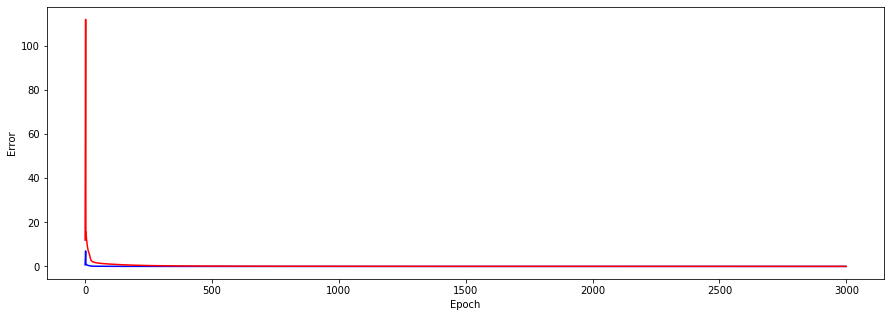

Cost after iteration 0: 0.749069
Cost after iteration 500: 0.008246
Cost after iteration 1000: 0.003724
Cost after iteration 1500: 0.002569
Cost after iteration 2000: 0.002017
Cost after iteration 2500: 0.001670


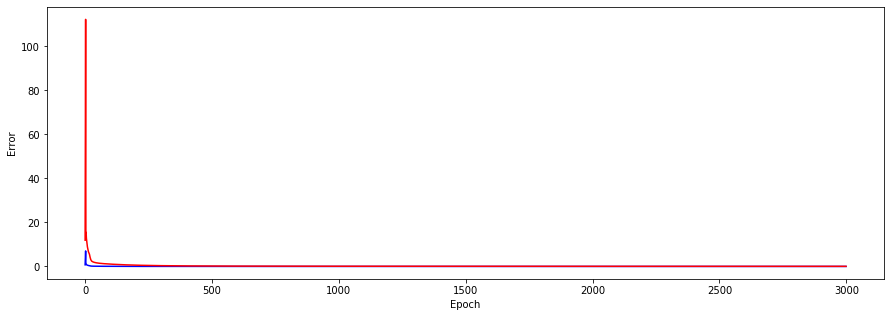

Cost after iteration 0: 0.748817
Cost after iteration 500: 0.005579
Cost after iteration 1000: 0.001879
Cost after iteration 1500: 0.001074
Cost after iteration 2000: 0.000739
Cost after iteration 2500: 0.000559


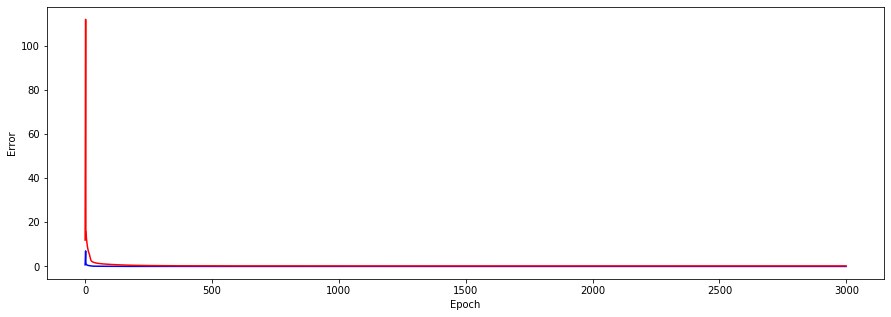

Cost after iteration 0: 0.748563
Cost after iteration 500: 0.008083
Cost after iteration 1000: 0.003634
Cost after iteration 1500: 0.002511
Cost after iteration 2000: 0.001979
Cost after iteration 2500: 0.001644


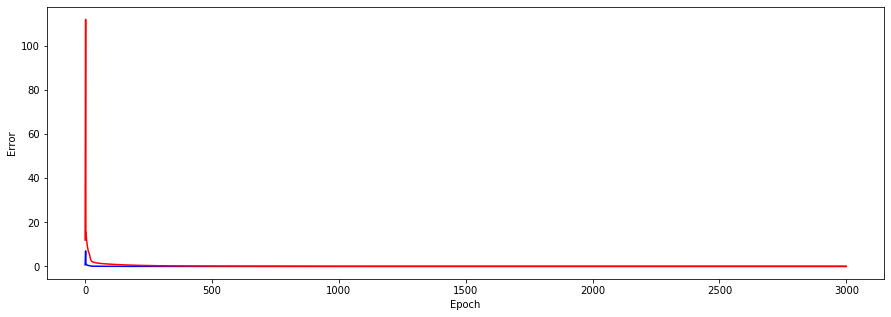

array([[0.10301631]])

In [158]:
k1, k2, k3, k4, output = Test.k_fold(pos_mut_fin_con, neg_mut_fin_con)
Test.test_NN(k1,k2,k3,k4, output)

In [159]:
all_train = np.append(k1, k2, axis=0)
all_train = np.append(all_train, k3, axis=0)
all_train = np.append(all_train, k4, axis=0)
print(len(all_train))
all_output = np.tile([1,0],int(len(all_train)/2))
print(len(all_output))
all_output=all_output.reshape((len(all_output)),1)
all_output.shape
NN = Test.dlnet(all_train.T, all_output.T)

7008
7008


In [160]:
for x in Future:
    for y in all_train:
        if np.array_equal(x, y):
            print('bad!!!')

bad!!!
bad!!!


In [161]:
NN.gd(all_train.T, all_output.T, Future.T, Future_output.T, iter = 3000)

Cost after iteration 0: 0.748807
Cost after iteration 500: 0.007922
Cost after iteration 1000: 0.003556
Cost after iteration 1500: 0.002425
Cost after iteration 2000: 0.001913
Cost after iteration 2500: 0.001607


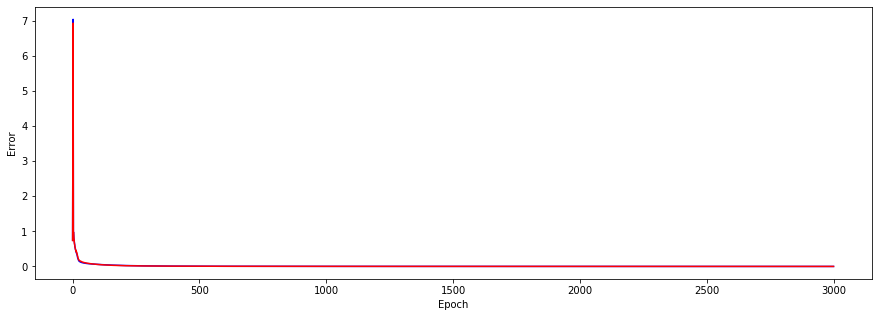

0.0017462212211922937


In [162]:
# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history, color = 'blue')
plt.plot(NN.epoch_list, NN.error_test, color = 'red')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()
print(NN.error_test[-1])

In [163]:
 NN.test(Future.T, Future_output.T)

(array([[9.99976539e-01, 9.99977254e-01, 9.97188202e-01, 9.99479840e-01,
         9.99948417e-01, 9.13695775e-01, 9.99595887e-01, 9.98257063e-01,
         9.97929751e-01, 9.98983032e-01, 9.99842874e-01, 9.96267519e-01,
         9.99921874e-01, 9.99614941e-01, 9.99735363e-01, 9.99924170e-01,
         9.98766863e-01, 9.96744484e-01, 9.91757380e-01, 9.99613070e-01,
         9.99845420e-01, 9.98332310e-01, 9.99986678e-01, 9.99133909e-01,
         9.99089505e-01, 9.99909470e-01, 9.99835284e-01, 9.91448057e-01,
         9.99929492e-01, 9.98170715e-01, 9.99792913e-01, 9.99955693e-01,
         9.98662844e-01, 9.98816179e-01, 9.99210105e-01, 9.89895326e-01,
         9.99314019e-01, 9.99955629e-01, 9.99857899e-01, 9.98470929e-01,
         9.99987484e-01, 9.99956339e-01, 9.99918295e-01, 9.99761387e-01,
         9.99554861e-01, 9.98736531e-01, 9.99885021e-01, 9.70180114e-01,
         9.99894747e-01, 9.98808610e-01, 9.99654034e-01, 9.99246315e-01,
         9.99625507e-01, 9.99859819e-01, 2.07739552

# 2 Mutation K-folds

Cost after iteration 0: 0.730526
Cost after iteration 500: 0.020118
Cost after iteration 1000: 0.005941
Cost after iteration 1500: 0.003811
Cost after iteration 2000: 0.002955
Cost after iteration 2500: 0.002474


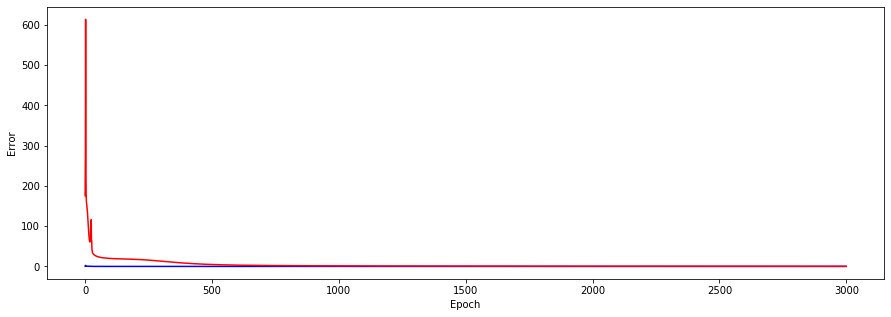

Cost after iteration 0: 0.730320
Cost after iteration 500: 0.020213
Cost after iteration 1000: 0.005668
Cost after iteration 1500: 0.003516
Cost after iteration 2000: 0.002646
Cost after iteration 2500: 0.002168


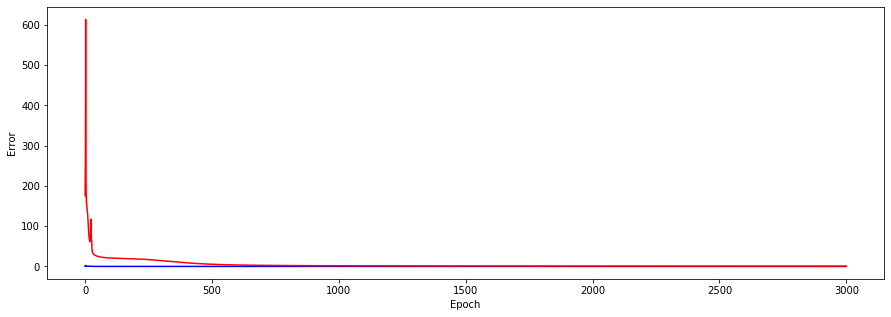

Cost after iteration 0: 0.730418
Cost after iteration 500: 0.020260
Cost after iteration 1000: 0.005632
Cost after iteration 1500: 0.003453
Cost after iteration 2000: 0.002564
Cost after iteration 2500: 0.002068


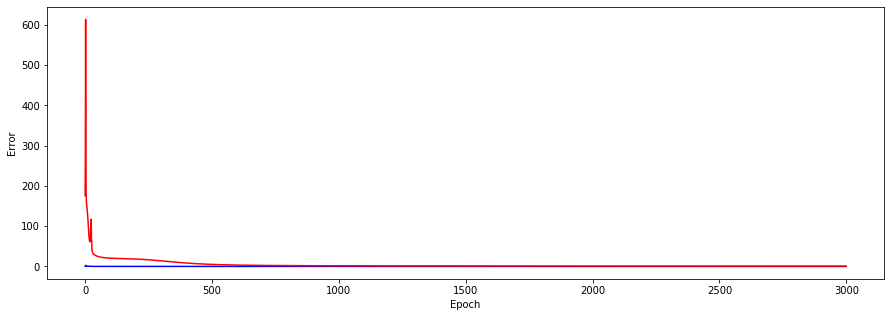

Cost after iteration 0: 0.730580
Cost after iteration 500: 0.019417
Cost after iteration 1000: 0.005696
Cost after iteration 1500: 0.003608
Cost after iteration 2000: 0.002762
Cost after iteration 2500: 0.002295


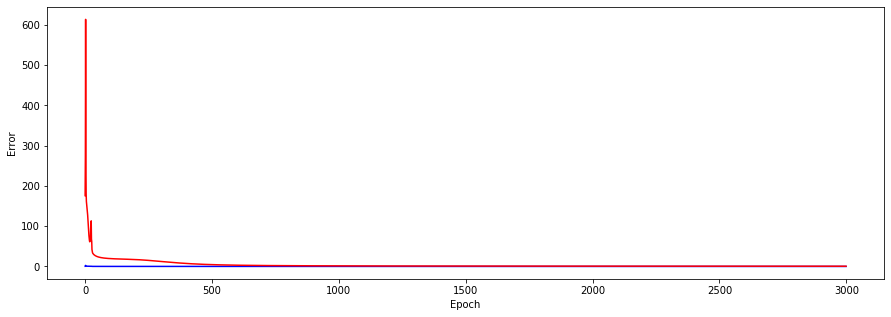

array([[0.60143987]])

In [45]:
k1, k2, k3, k4, output = Test.k_fold(pos_mut2_fin_con, neg_mut2_fin_con)
Test.test_NN(k1,k2,k3,k4, output, h=20)

In [46]:
all_train = np.append(k1, k2, axis=0)
all_train = np.append(all_train, k3, axis=0)
all_train = np.append(all_train, k4, axis=0)
print(len(all_train))
all_output = np.tile([1,0],int(len(all_train)/2))
print(len(all_output))
all_output=all_output.reshape((len(all_output)),1)
all_output.shape
NN = Test.dlnet(all_train.T, all_output.T)

105984
105984


In [47]:
for x in Future:
    for y in all_train:
        if np.array_equal(x, y):
            print('bad!!!')

bad!!!
bad!!!
bad!!!
bad!!!
bad!!!
bad!!!
bad!!!


Train data has 7 of the 55 positive sequences in it

In [48]:
NN.gd(all_train.T, all_output.T, Future.T, Future_output.T, iter = 3000)

Cost after iteration 0: 0.745676
Cost after iteration 500: 0.008785
Cost after iteration 1000: 0.004364
Cost after iteration 1500: 0.003155
Cost after iteration 2000: 0.002568
Cost after iteration 2500: 0.002212


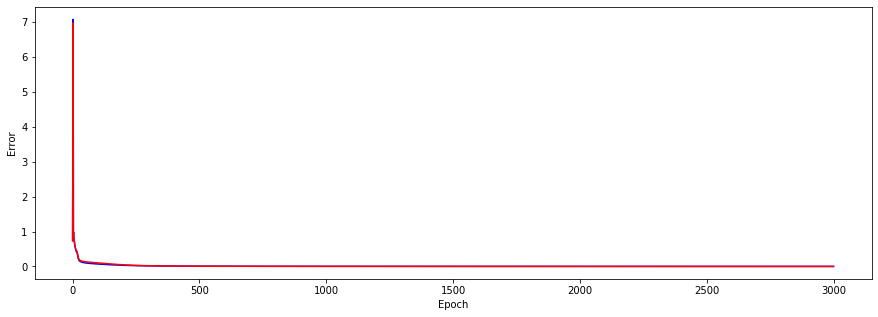

0.0011337495580346043


In [49]:
# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history, color = 'blue')
plt.plot(NN.epoch_list, NN.error_test, color = 'red')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()
print(NN.error_test[-1])

In [50]:
NN.test(Future.T, Future_output.T)

(array([[9.99906863e-01, 9.99882280e-01, 9.98665367e-01, 9.99486830e-01,
         9.99798613e-01, 9.92542569e-01, 9.99729382e-01, 9.99732700e-01,
         9.99519762e-01, 9.96874857e-01, 9.99301950e-01, 9.99813563e-01,
         9.99618673e-01, 9.99238061e-01, 9.95639224e-01, 9.99711504e-01,
         9.99879996e-01, 9.99519327e-01, 9.96540626e-01, 9.99713454e-01,
         9.99891870e-01, 9.98157274e-01, 9.99935511e-01, 9.89758018e-01,
         9.98956436e-01, 9.99699078e-01, 9.98379122e-01, 9.86087314e-01,
         9.99891353e-01, 9.99205427e-01, 9.97967794e-01, 9.99967512e-01,
         9.99651755e-01, 9.97503752e-01, 9.99894650e-01, 9.99765171e-01,
         9.96911457e-01, 9.99928330e-01, 9.99667654e-01, 9.99232142e-01,
         9.99911408e-01, 9.98725332e-01, 9.99803579e-01, 9.99438752e-01,
         9.99113640e-01, 9.89665311e-01, 9.99891495e-01, 9.74898002e-01,
         9.96734361e-01, 9.99933043e-01, 9.96663947e-01, 9.98404845e-01,
         9.99833661e-01, 9.99913520e-01, 1.18654873

# Train on 50 test on the rest to demonstrate a worse performance

In [62]:
test1 = np.append(k1, k2, axis =0)
test1 = np.append(test1, k3, axis =0)
train1 = k4
output1 = np.tile([1,0],int(len(train1)/2))
output1=output1.reshape((len(output1)),1)
output1_test= np.tile([1,0],int(len(test1)/2))
output1_test=output1_test.reshape((len(output1_test)),1)

In [63]:
len(train1)

110

In [64]:
NN = Test.dlnet(train1.T, output1.T)

In [65]:
NN.gd(train1.T, output1.T, test1.T, output1_test.T, iter = 3000)

Cost after iteration 0: 0.751119
Cost after iteration 500: 0.000973
Cost after iteration 1000: 0.000422
Cost after iteration 1500: 0.000262
Cost after iteration 2000: 0.000188
Cost after iteration 2500: 0.000146


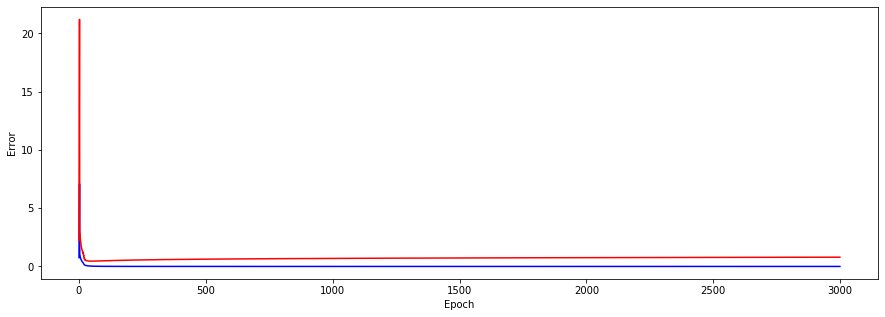

0.7944999668597216


In [66]:
# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history, color = 'blue')
plt.plot(NN.epoch_list, NN.error_test, color = 'red')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()
print(NN.error_test[-1])

In [67]:
temp=NN.test(Future.T, Future_output.T)

In [68]:
temp

(array([[9.99991041e-01, 9.99948825e-01, 9.92739865e-01, 9.99401233e-01,
         9.99930377e-01, 9.99993255e-01, 9.99961845e-01, 9.99959242e-01,
         9.99989877e-01, 9.99951433e-01, 9.99998286e-01, 9.78642235e-01,
         9.99993430e-01, 9.99445572e-01, 9.97466806e-01, 9.99972872e-01,
         9.99696705e-01, 9.99913029e-01, 9.99920407e-01, 9.99998091e-01,
         9.99999382e-01, 9.99603377e-01, 9.99987103e-01, 9.99689583e-01,
         9.99965109e-01, 9.99993258e-01, 9.76818271e-01, 9.99915752e-01,
         9.90553437e-01, 9.99975236e-01, 2.52131354e-01, 9.99983302e-01,
         9.99997210e-01, 9.99998292e-01, 9.99992049e-01, 6.29795317e-01,
         9.96450882e-01, 9.99990211e-01, 9.99976822e-01, 9.99945202e-01,
         9.99995617e-01, 9.99988982e-01, 9.99997296e-01, 9.99990194e-01,
         9.99988023e-01, 9.99993073e-01, 9.99962281e-01, 9.86990677e-01,
         9.99955638e-01, 9.99846692e-01, 9.99579806e-01, 9.99953881e-01,
         9.99748091e-01, 9.99999554e-01, 1.20846712

# Obtain final results

In [71]:
temp=Test.mutate(pos_final, 1)
print(len(temp))
print(len(temp[0])) # check to make sure that it is still 17 bp
temp=np.array(temp)
mtemp=(np.unique(temp))
print(len(temp))

POS_FINAL=Test.mutate2(temp, k=2)
print(len(POS_FINAL))
print(len(POS_FINAL[0]))
POS_FINAL = np.array(POS_FINAL)
POS_FINAL = (np.unique(POS_FINAL))
print(len(POS_FINAL))

3520
17
3520
56320
17
52992


In [75]:
NEG_FINAL = Test.get_neg_final(neg, POS_FINAL)
len(NEG_FINAL)

52992

In [92]:
POS_FINAL_CON = np.array(Test.convert(POS_FINAL))
NEG_FINAL_CON = np.array(Test.convert(NEG_FINAL))
print(POS_FINAL_CON.shape)
print(NEG_FINAL_CON.shape)
FINAL = np.append(POS_FINAL_CON,NEG_FINAL_CON, axis = 0)
FINAL_OUT = np.repeat([1,0],len(POS_FINAL_CON))
FINAL_OUT=FINAL_OUT.reshape((len(FINAL_OUT)),1)
print(FINAL.shape)
print(FINAL_OUT.shape)

(52992, 68)
(52992, 68)
(105984, 68)
(105984, 1)


In [113]:
NN_FIN = Test.dlnet(FINAL.T, FINAL_OUT.T)

In [89]:
TEST = Test.getTEST()
print(len(TEST))
TEST_FIN = np.array(Test.convert(TEST))
print(TEST_FIN.shape)

3195
(3195, 68)


In [114]:
NN_FIN.gd(FINAL.T, FINAL_OUT.T, iter = 3000)

Cost after iteration 0: 0.745433
Cost after iteration 500: 0.008545
Cost after iteration 1000: 0.004215
Cost after iteration 1500: 0.003019
Cost after iteration 2000: 0.002423
Cost after iteration 2500: 0.002054


In [115]:
Prediction = NN_FIN.Final_test(TEST_FIN.T)

In [116]:
(Prediction)[0]


array([1.46203738e-08, 1.72157388e-04, 5.08218870e-01, ...,
       4.07830253e-04, 2.86500176e-02, 9.03803513e-01])

In [117]:
d = {'seq': TEST, 'Prediction': (Prediction)[0]}
df = pd.DataFrame(data=d)

In [118]:
df

,seq,Prediction
0,AAAAAAACGCAACTAAT,1.462037e-08
1,AAAAACACACATCTGGC,1.721574e-04
2,AAAACCAAACACCTGAA,5.082189e-01
3,AAAACCAAACAGCTCAG,1.886118e-01
4,AAAACCAAACATATCAA,2.752030e-01
...,...,...
3190,TTGTTCATACATTCTTA,2.285866e-03
3191,TTGTTCATATCTTCCAA,2.513362e-07
3192,TTTCTCATACACCTTTA,4.078303e-04
3193,TTTTCCAAGCATTTGTA,2.865002e-02


In [120]:
df.to_csv('~/Downloads/Ian_Jones_BMI_Results',sep='\t')